<h1>Assignment 5: Data Analysis and Visualization</h1>


<ol>
<li>Read NYC Free Public WiFi data
<li>Calculate age of Wi-Fi hotspots and save in a new column "age"
<li>Analyze age distribution across boroughs
<li>Analyze type of Wi-Fi hotspots across boroughs
<li>Analyze boroughs, NTAs and SSID of Wi-Fi hotspots
<li>Read NTA demographic data
<li>Determine if the Wi-Fi hotspots are placed in locations such that they serve the public adequately

<h2>Installing and importing necessary libraries</h2>

In [1]:
!pip install folium

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
plt.style.use('seaborn')
%matplotlib inline

/var/folders/l5/qv6m8fz50kj98c_3j88t6rw40000gn/T/ipykernel_51556/1648838787.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<h2>Read the data</h2>
<li>Import NYC Free Public WiFi dataset

In [3]:
import pandas as pd
datafile = "NYC_Wi-Fi_Hotspot_Locations.csv"
df = pd.read_csv(datafile)
df

,OBJECTID,Borough,Type,Provider,Name,Location,Latitude,Longitude,X,Y,...,Neighborhood Tabulation Area (NTA),Council Distrcit,Postcode,BoroCD,Census Tract,BCTCB2010,BIN,BBL,DOITT_ID,"Location (Lat, Long)"
0,10604,4,Limited Free,SPECTRUM,Baisley Pond Park,Park Perimeter,40.674860,-73.784120,1.044132e+06,185219.892077,...,Springfield Gardens North,28,11434,412,294,294,0,0,1408,"(40.6748599999, -73.7841200005)"
1,10555,4,Limited Free,SPECTRUM,Kissena Park,Park Perimeter,40.747560,-73.818150,1.034638e+06,211685.217755,...,Flushing,20,11355,407,845,845,0,0,1359,"(40.7475599996, -73.8181499997)"
2,12370,3,Free,Transit Wireless,Grand St (L),Grand St (L),40.711926,-73.940670,1.000698e+06,198655.908840,...,East Williamsburg,34,11206,301,495,495,0,0,1699,"(40.7119259997, -73.9406699994)"
3,9893,3,Free,Downtown Brooklyn,NaN,125 Court St.,40.689985,-73.991995,9.864700e+05,190656.680416,...,Brooklyn Heights-Cobble Hill,33,11201,302,9,9,3388736,3002777501,298,"(40.6899850001, -73.9919950004)"
4,10169,1,Free,Transit Wireless,Lexington Av-63 St (F),Lexington Av-63 St (F),40.764630,-73.966115,9.936366e+05,217853.888161,...,Upper East Side-Carnegie Hill,4,10065,108,120,120,0,0,599,"(40.7646300002, -73.9661150001)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314,10872,3,Limited Free,SPECTRUM,Carroll Park,Court off Smith St between Carrol St and 1st P...,40.680630,-73.995382,9.855309e+05,187248.314202,...,Carroll Gardens-Columbia Street-Red Hook,39,11231,306,77,77,3007547,3004490015,1338,"(40.6806299998, -73.9953819995)"
3315,12026,2,Free,LinkNYC - Citybridge,bx-01-138789,312 WILLIS AVENUE,40.810896,-73.921434,1.005999e+06,234718.294065,...,Mott Haven-Port Morris,8,10454,201,39,39,2000335,2022850010,4113,"(40.8108964904, -73.9214341701)"
3316,12063,3,Free,LinkNYC - Citybridge,bk-01-143982,32 GRAHAM AVENUE,40.701930,-73.942239,1.000265e+06,195013.901033,...,East Williamsburg,34,11206,301,491,491,3071609,3031200000,3018,"(40.7019303441, -73.9422392381)"
3317,12066,3,Free,LinkNYC - Citybridge,bk-17-126527,1339 FLATBUSH AVENUE,40.638560,-73.953603,9.971268e+05,171924.271359,...,Erasmus,45,11226,317,790,790,3120360,3052110060,3021,"(40.6385596088, -73.9536032378)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3319 entries, 0 to 3318
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   OBJECTID                                     3319 non-null   int64  
 1   Borough                                      3319 non-null   int64  
 2   Type                                         3319 non-null   object 
 3   Provider                                     3319 non-null   object 
 4   Name                                         3089 non-null   object 
 5   Location                                     3319 non-null   object 
 6   Latitude                                     3319 non-null   float64
 7   Longitude                                    3319 non-null   float64
 8   X                                            3319 non-null   float64
 9   Y                                            3319 non-null   float64
 10  

<h2>Add a column for age of public WiFi locations</h2>
<li>Use Oct 1, 2023 as the current date
<li>Datetime column may consist of timezones so make sure to correctly deal with that too
<li>Calculate age as a float number of months. Use only the month part of the date to calculate the age. For example, if the activated date is Aug 31, 2023 then the age is 2 months. Make sure
to account for missing or invalid dates. Age for missing or invalid dates should be nan
<li>strptime formats: http://pubs.opengroup.org/onlinepubs/009695399/functions/strptime.html

In [5]:
from datetime import datetime

 

df['Activated'] = pd.to_datetime(df['Activated'], errors='coerce')
current_date = pd.to_datetime('2023-10-01')
df['Age (Months)'] = ((current_date.year - df['Activated'].dt.year) * 12 +
                      (current_date.month - df['Activated'].dt.month))
df.loc[df['Activated'].isna(), 'Age (Months)'] = float('nan')
df.to_csv('updated_data_file.csv', index=False)
df['Activated'] = pd.to_datetime(df['Activated'], errors='coerce')
current_date = pd.to_datetime('2023-10-01')
df['Age (Months)'] = ((current_date.year - df['Activated'].dt.year) * 12 +
                      (current_date.month - df['Activated'].dt.month))
df.loc[df['Activated'].isna(), 'Age (Months)'] = float('nan')
 
df.to_csv('updated_data_file.csv', index=False)
datafile = "updated_data_file.csv"
df = pd.read_csv(datafile)
df

,OBJECTID,Borough,Type,Provider,Name,Location,Latitude,Longitude,X,Y,...,Council Distrcit,Postcode,BoroCD,Census Tract,BCTCB2010,BIN,BBL,DOITT_ID,"Location (Lat, Long)",Age (Months)
0,10604,4,Limited Free,SPECTRUM,Baisley Pond Park,Park Perimeter,40.674860,-73.784120,1.044132e+06,185219.892077,...,28,11434,412,294,294,0,0,1408,"(40.6748599999, -73.7841200005)",NaN
1,10555,4,Limited Free,SPECTRUM,Kissena Park,Park Perimeter,40.747560,-73.818150,1.034638e+06,211685.217755,...,20,11355,407,845,845,0,0,1359,"(40.7475599996, -73.8181499997)",NaN
2,12370,3,Free,Transit Wireless,Grand St (L),Grand St (L),40.711926,-73.940670,1.000698e+06,198655.908840,...,34,11206,301,495,495,0,0,1699,"(40.7119259997, -73.9406699994)",NaN
3,9893,3,Free,Downtown Brooklyn,NaN,125 Court St.,40.689985,-73.991995,9.864700e+05,190656.680416,...,33,11201,302,9,9,3388736,3002777501,298,"(40.6899850001, -73.9919950004)",NaN
4,10169,1,Free,Transit Wireless,Lexington Av-63 St (F),Lexington Av-63 St (F),40.764630,-73.966115,9.936366e+05,217853.888161,...,4,10065,108,120,120,0,0,599,"(40.7646300002, -73.9661150001)",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314,10872,3,Limited Free,SPECTRUM,Carroll Park,Court off Smith St between Carrol St and 1st P...,40.680630,-73.995382,9.855309e+05,187248.314202,...,39,11231,306,77,77,3007547,3004490015,1338,"(40.6806299998, -73.9953819995)",NaN
3315,12026,2,Free,LinkNYC - Citybridge,bx-01-138789,312 WILLIS AVENUE,40.810896,-73.921434,1.005999e+06,234718.294065,...,8,10454,201,39,39,2000335,2022850010,4113,"(40.8108964904, -73.9214341701)",66.0
3316,12063,3,Free,LinkNYC - Citybridge,bk-01-143982,32 GRAHAM AVENUE,40.701930,-73.942239,1.000265e+06,195013.901033,...,34,11206,301,491,491,3071609,3031200000,3018,"(40.7019303441, -73.9422392381)",74.0
3317,12066,3,Free,LinkNYC - Citybridge,bk-17-126527,1339 FLATBUSH AVENUE,40.638560,-73.953603,9.971268e+05,171924.271359,...,45,11226,317,790,790,3120360,3052110060,3021,"(40.6385596088, -73.9536032378)",65.0


<li>Find the percentage of missing age values

In [6]:
 
missing_age_percentage = (df['Age (Months)'].isnull().sum() / len(df)) * 100

print(f"The percentage of missing age values is: {missing_age_percentage:.2f}%")


The percentage of missing age values is: 45.10%


<h2>Plot age distribution of Brooklyn and Bronx</h2>
<li>Find out which borough has gotten free Wi-Fi only recently

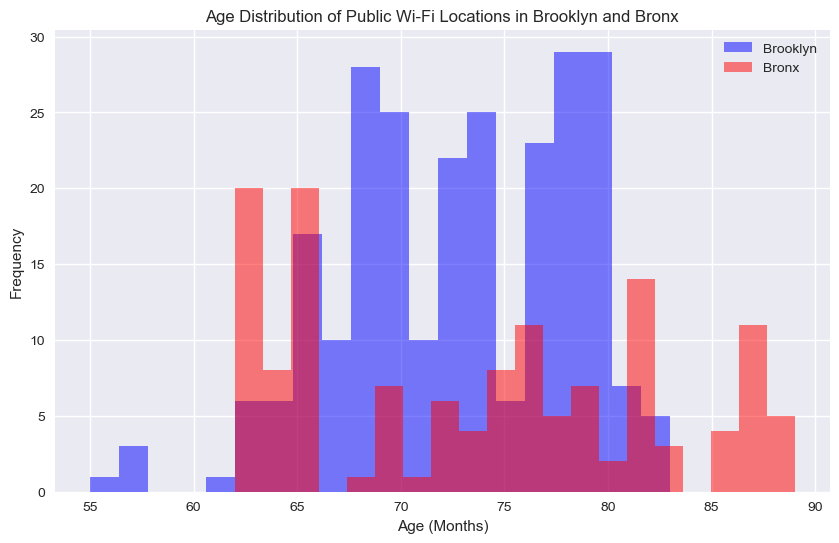

In [7]:
brooklyn_data = df[df['Borough Name'] == 'Brooklyn']
bronx_data = df[df['Borough Name'] == 'Bronx']
plt.figure(figsize=(10, 6))
plt.hist(brooklyn_data['Age (Months)'].dropna(), bins=20, alpha=0.5, label='Brooklyn', color='blue')
plt.hist(bronx_data['Age (Months)'].dropna(), bins=20, alpha=0.5, label='Bronx', color='red')
plt.xlabel('Age (Months)')
plt.ylabel('Frequency')
plt.title('Age Distribution of Public Wi-Fi Locations in Brooklyn and Bronx')
plt.legend()
plt.show()


<h2>Plot the scatter plot between borough and age</h2>

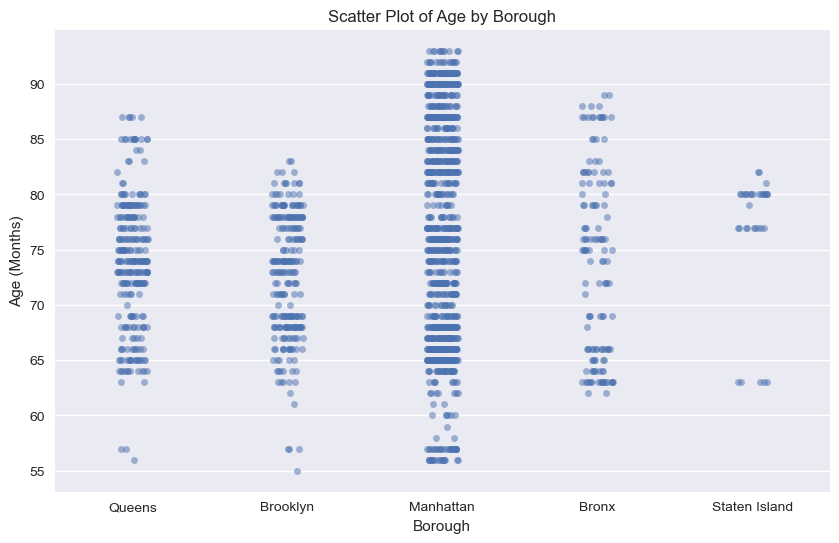

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

 
plt.figure(figsize=(10, 6))
sns.stripplot(x='Borough Name', y='Age (Months)', data=df, jitter=True, alpha=0.5)
plt.xlabel('Borough')
plt.ylabel('Age (Months)')
plt.title('Scatter Plot of Age by Borough')
plt.show()



<h2>Plot a bar graph that groups the data by borough and then by type (free, limited free, partner site)</h2>
The result should be a single plot with borough on the x-axis and number of free Wi-Fi hotspots on the y-axis. Different colors are used to distinguish different types in the legend.
<li>Do you notice any differences?</li>

<Figure size 1000x600 with 0 Axes>

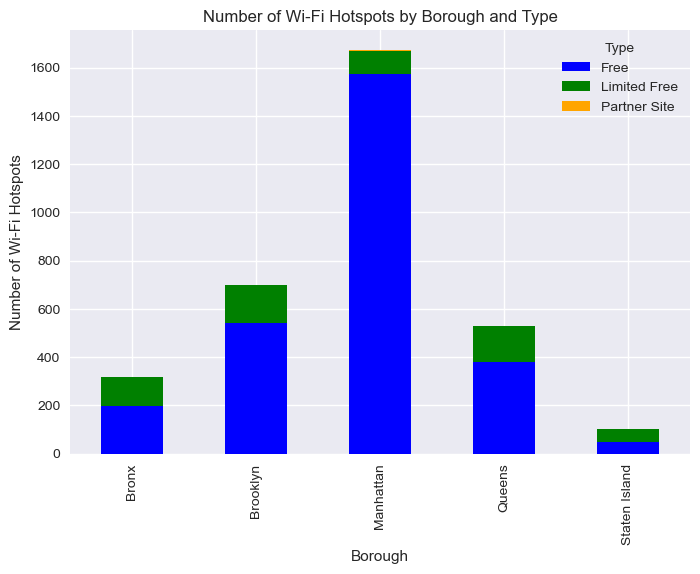

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

 
grouped_data = df.groupby(['Borough Name', 'Type']).size().reset_index(name='Count')
pivot_data = grouped_data.pivot(index='Borough Name', columns='Type', values='Count').fillna(0)
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'orange']
pivot_data.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('Borough')
plt.ylabel('Number of Wi-Fi Hotspots')
plt.title('Number of Wi-Fi Hotspots by Borough and Type')
plt.legend(title='Type', loc='upper right')

plt.show()


<h2>Calculate the following</h2>
<li>NTA with the highest number of Wi-Fi hotspots (alphabetically ascending for tie-breaking)
<li>NTA with the lowest number of Wi-Fi hotspots (alphabetically descending for tie-breaking)

In [28]:
 
nta_counts = df.groupby('Neighborhood Tabulation Area (NTA)').size().reset_index(name='Count')
 
nta_counts = nta_counts.sort_values(by=['Count', 'Neighborhood Tabulation Area (NTA)'], ascending=[False, True])
 
highest_nta = nta_counts.iloc[0]['Neighborhood Tabulation Area (NTA)']
 
lowest_nta = nta_counts.iloc[-1]['Neighborhood Tabulation Area (NTA)']

highest_count = nta_counts.iloc[0]['Count']
lowest_count = nta_counts.iloc[-1]['Count']

highest_nta, highest_count, lowest_nta, lowest_count


('Midtown-Midtown South', 160, 'Midtown-Midtown South', 1)

<h2>Top 5 neighborhoods in each borough</h2>
<li>Group data by the borough and the NTA
<li>Draw a figure of 5 plots that show the top 5 NTAs in each borough by number of Wi-Fi hotspots


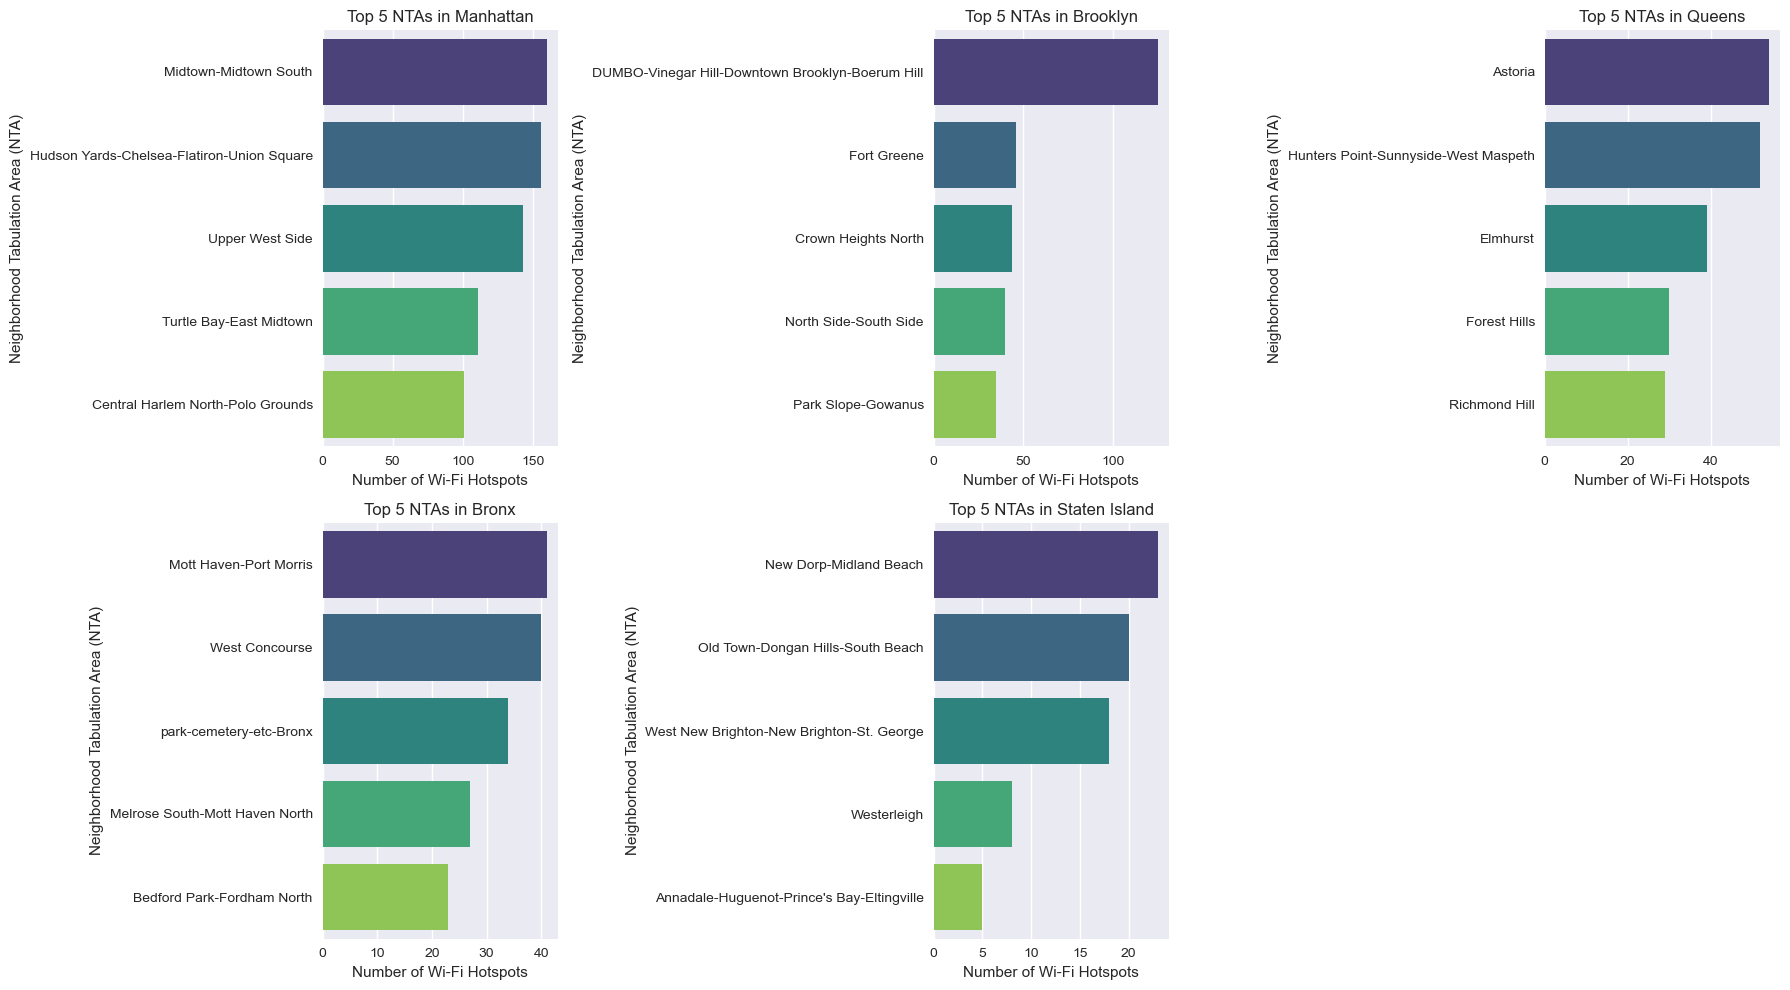

In [11]:
nta_counts = df.groupby(['Borough Name', 'Neighborhood Tabulation Area (NTA)']).size().reset_index(name='Count')
nta_counts = nta_counts.sort_values(by='Count', ascending=False)
boroughs = nta_counts['Borough Name'].unique()
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()

for i, borough in enumerate(boroughs):
 
    borough_data = nta_counts[nta_counts['Borough Name'] == borough]
    top5_ntas = borough_data.head(5)
    sns.barplot(x='Count', y='Neighborhood Tabulation Area (NTA)', data=top5_ntas, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Top 5 NTAs in {borough}')
    axes[i].set_xlabel('Number of Wi-Fi Hotspots')
    axes[i].set_ylabel('Neighborhood Tabulation Area (NTA)')

for i in range(len(boroughs), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


<h2>Popular SSIDs in each borough</h2>
<li>Group data by the SSID and the borough
<li>Draw a figure of 5 plots that show the number of Wi-Fi hotspots by SSID in descending order

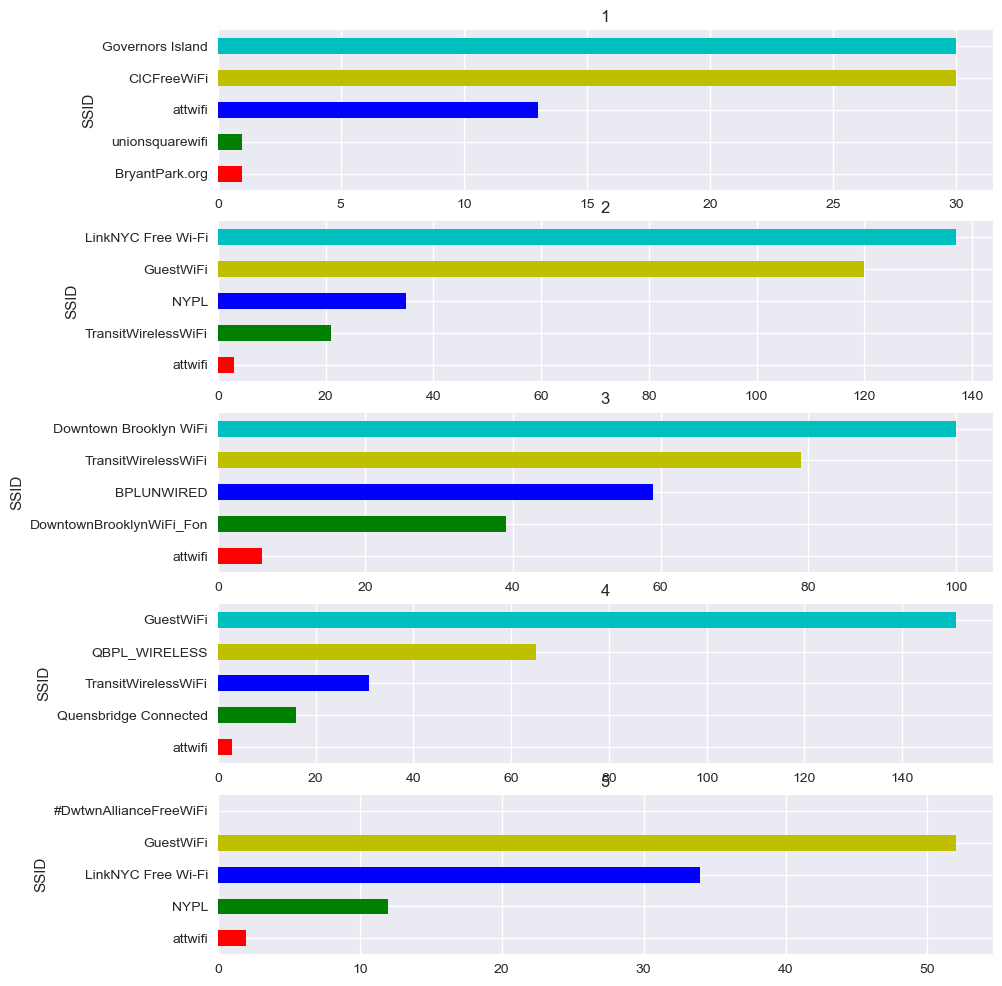

In [25]:

ssid_borough = df.groupby(['SSID','Borough']).size().unstack()

COL_NUM = 1
ROW_NUM = 5
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(10,12))
colors = ['r','g','b','y','c']

for i, (borough, ssid_count) in enumerate(ssid_borough.items()): 
    ax = axes[i % ROW_NUM]
    ssid_count = ssid_count.sort_values(ascending=True)[:5] 
    ssid_count.plot(kind='barh', ax=ax, color=colors)
    ax.set_title(borough)

<h1>Are Wi-Fi hotspots located such that everyone has adequate access?</h1>
<li>Group data by NTA and count the total number of hotspots per NTA in a column named 'total_hotspots'. Save this df as per_capita_df
<li>Import Population_by_NTA.csv and join with the per_capita_df using NTA Code to get population

In [13]:
import pandas as pd
 
per_capita_df = df.groupby('Neighborhood Tabulation Area Code (NTACODE)').size().reset_index(name='total_hotspots')
per_capita_df.set_index('Neighborhood Tabulation Area Code (NTACODE)', inplace=True)
print(per_capita_df)
 
 

population_df = pd.read_csv('Population_by_NTA.csv')
nta_population = population_df[['NTA Code', 'Population']].groupby('NTA Code').sum()
print(nta_population)

per_capita_df = per_capita_df.join(nta_population)
per_capita_df['persons_per_hotspot'] = per_capita_df['Population'] / per_capita_df['total_hotspots']
per_capita_df


df



                                             total_hotspots
Neighborhood Tabulation Area Code (NTACODE)                
BK09                                                     27
BK17                                                     18
BK19                                                      1
BK21                                                     32
BK25                                                      1
...                                                     ...
SI35                                                      1
SI36                                                     20
SI37                                                      5
SI45                                                     23
SI54                                                      2

[178 rows x 1 columns]
          Population
NTA Code            
BK09           45435
BK17          129114
BK19           70791
BK21           66232
BK23           35120
...              ...
SI37           50501
SI45   

,OBJECTID,Borough,Type,Provider,Name,Location,Latitude,Longitude,X,Y,...,Council Distrcit,Postcode,BoroCD,Census Tract,BCTCB2010,BIN,BBL,DOITT_ID,"Location (Lat, Long)",Age (Months)
0,10604,4,Limited Free,SPECTRUM,Baisley Pond Park,Park Perimeter,40.674860,-73.784120,1.044132e+06,185219.892077,...,28,11434,412,294,294,0,0,1408,"(40.6748599999, -73.7841200005)",NaN
1,10555,4,Limited Free,SPECTRUM,Kissena Park,Park Perimeter,40.747560,-73.818150,1.034638e+06,211685.217755,...,20,11355,407,845,845,0,0,1359,"(40.7475599996, -73.8181499997)",NaN
2,12370,3,Free,Transit Wireless,Grand St (L),Grand St (L),40.711926,-73.940670,1.000698e+06,198655.908840,...,34,11206,301,495,495,0,0,1699,"(40.7119259997, -73.9406699994)",NaN
3,9893,3,Free,Downtown Brooklyn,NaN,125 Court St.,40.689985,-73.991995,9.864700e+05,190656.680416,...,33,11201,302,9,9,3388736,3002777501,298,"(40.6899850001, -73.9919950004)",NaN
4,10169,1,Free,Transit Wireless,Lexington Av-63 St (F),Lexington Av-63 St (F),40.764630,-73.966115,9.936366e+05,217853.888161,...,4,10065,108,120,120,0,0,599,"(40.7646300002, -73.9661150001)",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314,10872,3,Limited Free,SPECTRUM,Carroll Park,Court off Smith St between Carrol St and 1st P...,40.680630,-73.995382,9.855309e+05,187248.314202,...,39,11231,306,77,77,3007547,3004490015,1338,"(40.6806299998, -73.9953819995)",NaN
3315,12026,2,Free,LinkNYC - Citybridge,bx-01-138789,312 WILLIS AVENUE,40.810896,-73.921434,1.005999e+06,234718.294065,...,8,10454,201,39,39,2000335,2022850010,4113,"(40.8108964904, -73.9214341701)",66.0
3316,12063,3,Free,LinkNYC - Citybridge,bk-01-143982,32 GRAHAM AVENUE,40.701930,-73.942239,1.000265e+06,195013.901033,...,34,11206,301,491,491,3071609,3031200000,3018,"(40.7019303441, -73.9422392381)",74.0
3317,12066,3,Free,LinkNYC - Citybridge,bk-17-126527,1339 FLATBUSH AVENUE,40.638560,-73.953603,9.971268e+05,171924.271359,...,45,11226,317,790,790,3120360,3052110060,3021,"(40.6385596088, -73.9536032378)",65.0


<li>Create a persons_per_hotspot column in per_capita_df which is population/total_hotspots

<li>Join persons_per_hotspot to the original dataframe on NTA Code

In [14]:
 
 
df = df.join(per_capita_df['persons_per_hotspot'], on='Neighborhood Tabulation Area Code (NTACODE)', rsuffix='_per_capita')
df
 



,OBJECTID,Borough,Type,Provider,Name,Location,Latitude,Longitude,X,Y,...,Postcode,BoroCD,Census Tract,BCTCB2010,BIN,BBL,DOITT_ID,"Location (Lat, Long)",Age (Months),persons_per_hotspot
0,10604,4,Limited Free,SPECTRUM,Baisley Pond Park,Park Perimeter,40.674860,-73.784120,1.044132e+06,185219.892077,...,11434,412,294,294,0,0,1408,"(40.6748599999, -73.7841200005)",NaN,10170.000000
1,10555,4,Limited Free,SPECTRUM,Kissena Park,Park Perimeter,40.747560,-73.818150,1.034638e+06,211685.217755,...,11355,407,845,845,0,0,1359,"(40.7475599996, -73.8181499997)",NaN,23561.666667
2,12370,3,Free,Transit Wireless,Grand St (L),Grand St (L),40.711926,-73.940670,1.000698e+06,198655.908840,...,11206,301,495,495,0,0,1699,"(40.7119259997, -73.9406699994)",NaN,3001.636364
3,9893,3,Free,Downtown Brooklyn,NaN,125 Court St.,40.689985,-73.991995,9.864700e+05,190656.680416,...,11201,302,9,9,3388736,3002777501,298,"(40.6899850001, -73.9919950004)",NaN,1682.777778
4,10169,1,Free,Transit Wireless,Lexington Av-63 St (F),Lexington Av-63 St (F),40.764630,-73.966115,9.936366e+05,217853.888161,...,10065,108,120,120,0,0,599,"(40.7646300002, -73.9661150001)",NaN,2312.425926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314,10872,3,Limited Free,SPECTRUM,Carroll Park,Court off Smith St between Carrol St and 1st P...,40.680630,-73.995382,9.855309e+05,187248.314202,...,11231,306,77,77,3007547,3004490015,1338,"(40.6806299998, -73.9953819995)",NaN,2949.230769
3315,12026,2,Free,LinkNYC - Citybridge,bx-01-138789,312 WILLIS AVENUE,40.810896,-73.921434,1.005999e+06,234718.294065,...,10454,201,39,39,2000335,2022850010,4113,"(40.8108964904, -73.9214341701)",66.0,2474.219512
3316,12063,3,Free,LinkNYC - Citybridge,bk-01-143982,32 GRAHAM AVENUE,40.701930,-73.942239,1.000265e+06,195013.901033,...,11206,301,491,491,3071609,3031200000,3018,"(40.7019303441, -73.9422392381)",74.0,3001.636364
3317,12066,3,Free,LinkNYC - Citybridge,bk-17-126527,1339 FLATBUSH AVENUE,40.638560,-73.953603,9.971268e+05,171924.271359,...,11226,317,790,790,3120360,3052110060,3021,"(40.6385596088, -73.9536032378)",65.0,5110.833333


<h2>Mapping</h2>
<li>Draw a folium heatmap using estimated number of people using each Wi-Fi hotspot

In [23]:
import folium
from folium.plugins import HeatMap
 
df[['Latitude', 'Longitude']] = df['Location (Lat, Long)'].str.extract(r'\(([^,]+),([^)]+)\)').astype(float)
 
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

heat_data = df[['Latitude', 'Longitude', 'persons_per_hotspot']].values.tolist()
m = HeatMap(heat_data).add_to(nyc_map)
nyc_map

 
 
